# Tarea N°02

## Instrucciones

1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.


* __Nombre__: Félix Vergara

* __Rol__: 201510524-3

2.- Debes _pushear_ este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.- Clasificación de dígitos


En este laboratorio realizaremos el trabajo de reconocer un dígito a partir de una imagen.


![rgb](https://www.wolfram.com/language/11/neural-networks/assets.en/digit-classification/smallthumb_1.png)

El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. 

* Se solicita ajustar al menos tres modelos de clasificación:
 * Regresión logística
 * K-Nearest Neighbours 
 * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
 
 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)



### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [5]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [6]:
digits.describe()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [7]:
digits.memory_usage()

Index       128
c00       14376
c01       14376
c02       14376
c03       14376
          ...  
c60       14376
c61       14376
c62       14376
c63       14376
target    14376
Length: 66, dtype: int64

In [8]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int64
 1   c01     1797 non-null   int64
 2   c02     1797 non-null   int64
 3   c03     1797 non-null   int64
 4   c04     1797 non-null   int64
 5   c05     1797 non-null   int64
 6   c06     1797 non-null   int64
 7   c07     1797 non-null   int64
 8   c08     1797 non-null   int64
 9   c09     1797 non-null   int64
 10  c10     1797 non-null   int64
 11  c11     1797 non-null   int64
 12  c12     1797 non-null   int64
 13  c13     1797 non-null   int64
 14  c14     1797 non-null   int64
 15  c15     1797 non-null   int64
 16  c16     1797 non-null   int64
 17  c17     1797 non-null   int64
 18  c18     1797 non-null   int64
 19  c19     1797 non-null   int64
 20  c20     1797 non-null   int64
 21  c21     1797 non-null   int64
 22  c22     1797 non-null   int64
 23  c23     1797 

In [9]:
digits.shape

(1797, 65)

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [10]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`. 

Sugerencia: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

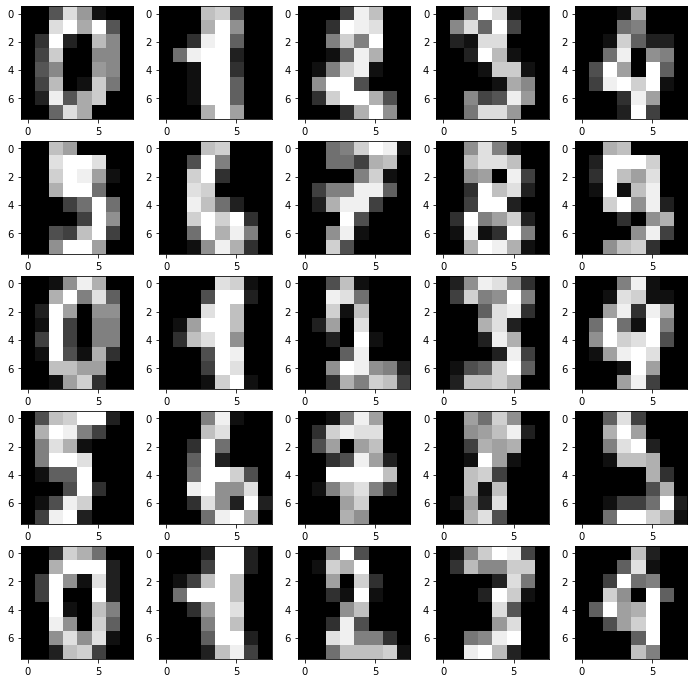

In [11]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
for x in range(0,5):
    for y in range(0,5):
        axs[x,y].imshow(digits_dict['images'][5*x+y], cmap = 'gray')

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test** 
 * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
 * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
 
 
* **modelo**:
 * Instanciar el modelo objetivo desde la librería sklearn.
 * *Hiper-parámetros*: Utiliza `sklearn.model_selection.GridSearchCV` para obtener la mejor estimación de los parámetros del modelo objetivo.




* **Métricas**:
 * Graficar matriz de confusión.
 * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [12]:
X = digits.drop(columns="target").values
y = digits["target"].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

print('Largo del conjunto de entrenamiento: ', len(X_train))
print('Largo del conjunto de testeo: ', len(X_test))

Largo del conjunto de entrenamiento:  1347
Largo del conjunto de testeo:  450


# 3.1 Regresión Logística

In [14]:
import os
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [15]:
model=LogisticRegression()
param = {'penalty': ['l1', 'l2'],'random_state': [0,2000], 'C':[1,2,3,4,5], 'solver':[ 'liblinear']}
model_grid=GridSearchCV(estimator=model,param_grid=param)
model_grid.fit(X_train,y_train)
print('Los mejores parametros son: ', model_grid.best_params_)
print('La precisión es de: ', model_grid.best_score_)

Los mejores parametros son:  {'C': 1, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}
La precisión es de:  0.9569599339116067


In [16]:
# metrics

from metrics_classification import *
from sklearn.metrics import confusion_matrix

y_true =  list(y_test)
y_pred = list(model_grid.predict(X_test))

print('Valores:\n')
print('originales: ', y_true)
print('predicho:   ', y_pred)

Valores:

originales:  [4, 0, 9, 1, 4, 7, 1, 5, 1, 6, 6, 7, 6, 1, 5, 5, 4, 6, 2, 7, 4, 6, 4, 1, 5, 2, 9, 5, 4, 6, 5, 6, 3, 4, 0, 9, 9, 8, 4, 6, 8, 8, 5, 7, 9, 6, 9, 6, 1, 3, 0, 1, 9, 7, 3, 3, 1, 1, 8, 8, 9, 8, 5, 4, 4, 7, 3, 5, 8, 4, 3, 1, 3, 8, 7, 3, 3, 0, 8, 7, 2, 8, 5, 3, 8, 7, 6, 4, 6, 2, 2, 0, 1, 1, 5, 3, 5, 7, 6, 8, 2, 2, 6, 4, 6, 7, 3, 7, 3, 9, 4, 7, 0, 3, 5, 8, 5, 0, 3, 9, 2, 7, 3, 2, 0, 8, 1, 9, 2, 1, 9, 1, 0, 3, 4, 3, 0, 9, 3, 2, 2, 7, 3, 1, 6, 7, 2, 8, 3, 1, 1, 6, 4, 8, 2, 1, 8, 4, 1, 3, 1, 1, 9, 5, 4, 8, 7, 4, 8, 9, 5, 7, 6, 9, 0, 0, 4, 0, 0, 4, 0, 6, 5, 8, 8, 3, 7, 9, 2, 0, 3, 2, 7, 3, 0, 2, 1, 5, 2, 7, 0, 6, 9, 3, 1, 1, 3, 5, 2, 3, 5, 2, 1, 2, 9, 4, 6, 5, 5, 5, 9, 7, 1, 5, 9, 6, 3, 7, 1, 7, 5, 1, 7, 2, 7, 5, 5, 4, 8, 6, 6, 2, 8, 7, 3, 7, 8, 0, 9, 5, 7, 4, 3, 4, 1, 0, 3, 3, 5, 4, 1, 3, 1, 2, 5, 1, 4, 0, 3, 1, 5, 5, 7, 4, 0, 1, 0, 8, 5, 5, 5, 4, 0, 1, 8, 6, 2, 1, 1, 1, 7, 9, 6, 7, 9, 7, 0, 4, 9, 6, 9, 2, 7, 2, 1, 0, 8, 2, 8, 6, 5, 7, 8, 4, 5, 7, 8, 6, 5, 2, 6, 9, 3, 0, 0, 8

In [17]:
print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))


Matriz de confusion:
 
[[42  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  3  1]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  2  0  2  1  0]
 [ 0  0  0  0 36  0  0  0  1  3]
 [ 0  1  0  0  0 49  0  0  1  1]
 [ 0  0  0  0  0  0 42  0  1  0]
 [ 0  0  0  0  0  0  0 48  1  0]
 [ 0  2  0  0  0  0  0  0 38  0]
 [ 0  0  0  1  0  1  0  1  1 35]]


In [18]:
# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
print("\nMetricas para los regresores")
print("")
df_metrics


Metricas para los regresores



,accuracy,recall,precision,fscore
0,0.9444,0.9442,0.946,0.9441


In [19]:
df_1 = summary_metrics(df_temp)

# 3.2 K-Nearest

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
model=KNeighborsClassifier()
param = {
    'n_neighbors': (1,10, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev'),}  
model_grid=GridSearchCV(estimator=model,param_grid=param)
model_grid.fit(X_train,y_train)
print('Los mejores parametros son: ', model_grid.best_params_)
print('La precisión es de: ', model_grid.best_score_)

Los mejores parametros son:  {'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
La precisión es de:  0.9851466336224701


In [22]:
# metrics

from metrics_classification import *
from sklearn.metrics import confusion_matrix

y_true =  list(y_test)
y_pred = list(model_grid.predict(X_test))

print('Valores:\n')
print('originales: ', y_true)
print('predicho:   ', y_pred)

Valores:

originales:  [4, 0, 9, 1, 4, 7, 1, 5, 1, 6, 6, 7, 6, 1, 5, 5, 4, 6, 2, 7, 4, 6, 4, 1, 5, 2, 9, 5, 4, 6, 5, 6, 3, 4, 0, 9, 9, 8, 4, 6, 8, 8, 5, 7, 9, 6, 9, 6, 1, 3, 0, 1, 9, 7, 3, 3, 1, 1, 8, 8, 9, 8, 5, 4, 4, 7, 3, 5, 8, 4, 3, 1, 3, 8, 7, 3, 3, 0, 8, 7, 2, 8, 5, 3, 8, 7, 6, 4, 6, 2, 2, 0, 1, 1, 5, 3, 5, 7, 6, 8, 2, 2, 6, 4, 6, 7, 3, 7, 3, 9, 4, 7, 0, 3, 5, 8, 5, 0, 3, 9, 2, 7, 3, 2, 0, 8, 1, 9, 2, 1, 9, 1, 0, 3, 4, 3, 0, 9, 3, 2, 2, 7, 3, 1, 6, 7, 2, 8, 3, 1, 1, 6, 4, 8, 2, 1, 8, 4, 1, 3, 1, 1, 9, 5, 4, 8, 7, 4, 8, 9, 5, 7, 6, 9, 0, 0, 4, 0, 0, 4, 0, 6, 5, 8, 8, 3, 7, 9, 2, 0, 3, 2, 7, 3, 0, 2, 1, 5, 2, 7, 0, 6, 9, 3, 1, 1, 3, 5, 2, 3, 5, 2, 1, 2, 9, 4, 6, 5, 5, 5, 9, 7, 1, 5, 9, 6, 3, 7, 1, 7, 5, 1, 7, 2, 7, 5, 5, 4, 8, 6, 6, 2, 8, 7, 3, 7, 8, 0, 9, 5, 7, 4, 3, 4, 1, 0, 3, 3, 5, 4, 1, 3, 1, 2, 5, 1, 4, 0, 3, 1, 5, 5, 7, 4, 0, 1, 0, 8, 5, 5, 5, 4, 0, 1, 8, 6, 2, 1, 1, 1, 7, 9, 6, 7, 9, 7, 0, 4, 9, 6, 9, 2, 7, 2, 1, 0, 8, 2, 8, 6, 5, 7, 8, 4, 5, 7, 8, 6, 5, 2, 6, 9, 3, 0, 0, 8

In [23]:
print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))


Matriz de confusion:
 
[[42  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 48  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  1  1  1]
 [ 0  0  0  0  0 52  0  0  0  0]
 [ 0  0  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0  0  0 49  0  0]
 [ 0  1  0  0  0  0  0  0 39  0]
 [ 0  0  0  1  0  0  0  1  1 36]]


In [24]:
# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
print("\nMetricas para los regresores")
print("")
df_metrics


Metricas para los regresores



,accuracy,recall,precision,fscore
0,0.9844,0.9823,0.9845,0.9831


In [25]:
df_2=summary_metrics(df_temp)

# 3.3 SVM

In [26]:
from sklearn import svm
from sklearn.svm import SVC

In [27]:
model = svm.SVC()
params = {'kernel' :('linear','poly','rbf', 'sigmoid') , 'C':range(1,10)}
model_grid = GridSearchCV(estimator = model, param_grid = params)
model_grid.fit(X_train, y_train)
print('Los mejores parametros son: ', model_grid.best_params_)
print('La precisión es de: ', model_grid.best_score_)

Los mejores parametros son:  {'C': 2, 'kernel': 'rbf'}
La precisión es de:  0.990356601955115


In [28]:
# metrics
from metrics_classification import *
from sklearn.metrics import confusion_matrix
svm_final = model_grid.best_estimator_
svm_final.fit(X_train, y_train)

y_true =  list(y_test)
y_pred = list(model_grid.predict(X_test))

print('Valores:\n')
print('originales: ', y_true)
print('predicho:   ', y_pred)

Valores:

originales:  [4, 0, 9, 1, 4, 7, 1, 5, 1, 6, 6, 7, 6, 1, 5, 5, 4, 6, 2, 7, 4, 6, 4, 1, 5, 2, 9, 5, 4, 6, 5, 6, 3, 4, 0, 9, 9, 8, 4, 6, 8, 8, 5, 7, 9, 6, 9, 6, 1, 3, 0, 1, 9, 7, 3, 3, 1, 1, 8, 8, 9, 8, 5, 4, 4, 7, 3, 5, 8, 4, 3, 1, 3, 8, 7, 3, 3, 0, 8, 7, 2, 8, 5, 3, 8, 7, 6, 4, 6, 2, 2, 0, 1, 1, 5, 3, 5, 7, 6, 8, 2, 2, 6, 4, 6, 7, 3, 7, 3, 9, 4, 7, 0, 3, 5, 8, 5, 0, 3, 9, 2, 7, 3, 2, 0, 8, 1, 9, 2, 1, 9, 1, 0, 3, 4, 3, 0, 9, 3, 2, 2, 7, 3, 1, 6, 7, 2, 8, 3, 1, 1, 6, 4, 8, 2, 1, 8, 4, 1, 3, 1, 1, 9, 5, 4, 8, 7, 4, 8, 9, 5, 7, 6, 9, 0, 0, 4, 0, 0, 4, 0, 6, 5, 8, 8, 3, 7, 9, 2, 0, 3, 2, 7, 3, 0, 2, 1, 5, 2, 7, 0, 6, 9, 3, 1, 1, 3, 5, 2, 3, 5, 2, 1, 2, 9, 4, 6, 5, 5, 5, 9, 7, 1, 5, 9, 6, 3, 7, 1, 7, 5, 1, 7, 2, 7, 5, 5, 4, 8, 6, 6, 2, 8, 7, 3, 7, 8, 0, 9, 5, 7, 4, 3, 4, 1, 0, 3, 3, 5, 4, 1, 3, 1, 2, 5, 1, 4, 0, 3, 1, 5, 5, 7, 4, 0, 1, 0, 8, 5, 5, 5, 4, 0, 1, 8, 6, 2, 1, 1, 1, 7, 9, 6, 7, 9, 7, 0, 4, 9, 6, 9, 2, 7, 2, 1, 0, 8, 2, 8, 6, 5, 7, 8, 4, 5, 7, 8, 6, 5, 2, 6, 9, 3, 0, 0, 8

In [29]:
print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))


Matriz de confusion:
 
[[42  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 46  0  1  0  0  1  0]
 [ 0  0  0  0 37  0  0  0  3  0]
 [ 0  0  0  0  0 52  0  0  0  0]
 [ 0  0  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0  0  0 49  0  0]
 [ 0  1  0  0  0  0  0  0 39  0]
 [ 0  0  0  0  0  1  0  1  1 36]]


In [30]:
# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
print("\nMetricas para los regresores")
print("")
df_metrics


Metricas para los regresores



,accuracy,recall,precision,fscore
0,0.98,0.9781,0.981,0.9789


In [31]:
df_3 =summary_metrics(df_temp)

In [32]:
comparacion = []
comparacion.append(df_1)
comparacion.append(df_2)
comparacion.append(df_3)
comparacion = pd.concat(comparacion)
comparacion['Modelo'] = ['Regresión Logística','K-Nearest','SVM']
comparacion

,accuracy,recall,precision,fscore,Modelo
0,0.9444,0.9442,0.9460,0.9441,Regresión Logística
0,0.9844,0.9823,0.9845,0.9831,K-Nearest
0,0.9800,0.9781,0.9810,0.9789,SVM


De la comparación anterior obtenemos que el mejor modelo ese l SVM

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:



 * **Cross validation**: usando **cv** (con n_fold = 10), sacar una especie de "intervalo de confianza" sobre alguna de las métricas estudiadas en clases: 
  * $\mu \pm \sigma$ = promedio $\pm$ desviación estandar
 * **Curva de Validación**: Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.
 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

# Cross validation

In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_grid, X, y, cv=10)
print('Precisión: ', round(scores.mean(),2 ),'+/-', round(scores.std() * 2), 2)

Precisión:  0.98 +/- 0 2


# Curva de validacion

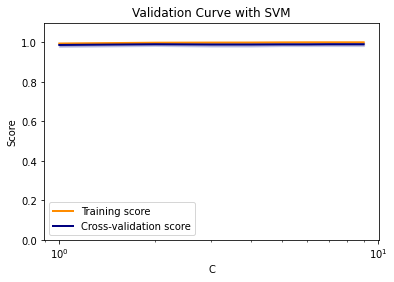

In [34]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

model=svm.SVC(C= 2, kernel= 'rbf')
param_range = np.arange(1,10)
train_scores, test_scores = validation_curve(
    model,
    X_train,
    y_train,
    param_name='C',
    param_range=np.arange(1,10),
    scoring="accuracy",
    n_jobs=1,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel('C')
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()

# Curva AUC-ROC

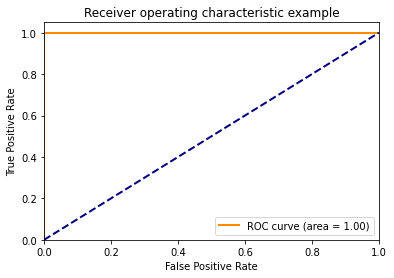

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

n_classes=y.shape[0]
y_binarize = label_binarize(y, classes=[0,1,2])
# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=2)
)
X_train, X_test, y_train, y_test = train_test_split(X, y_binarize, test_size=0.25, random_state=2)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### Ejercicio 5
__Reducción de la dimensión:__ Tomando en cuenta el mejor modelo encontrado en el `Ejercicio 3`, debe realizar una redcción de dimensionalidad del conjunto de datos. Para ello debe abordar el problema ocupando los dos criterios visto en clases:  

* **Selección de atributos**
* **Extracción de atributos**

__Preguntas a responder:__

Una vez realizado la reducción de dimensionalidad, debe sacar algunas estadísticas y gráficas comparativas entre el conjunto de datos original y el nuevo conjunto de datos (tamaño del dataset, tiempo de ejecución del modelo, etc.)


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

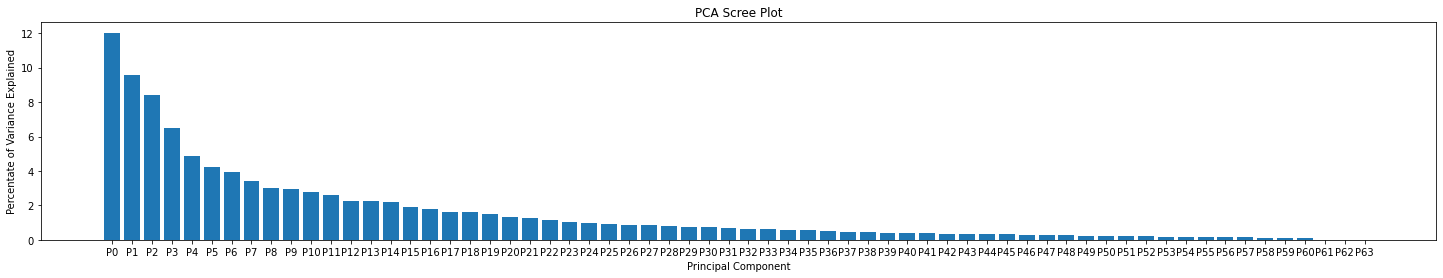

In [37]:
x = StandardScaler().fit_transform(X)

n_components = 64
pca = PCA(n_components)
principalComponents = pca.fit_transform(x)

percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = [ 'P'+str(i) for i in range(n_components)]

plt.figure(figsize=(25,4))
plt.bar(x= range(0,n_components), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

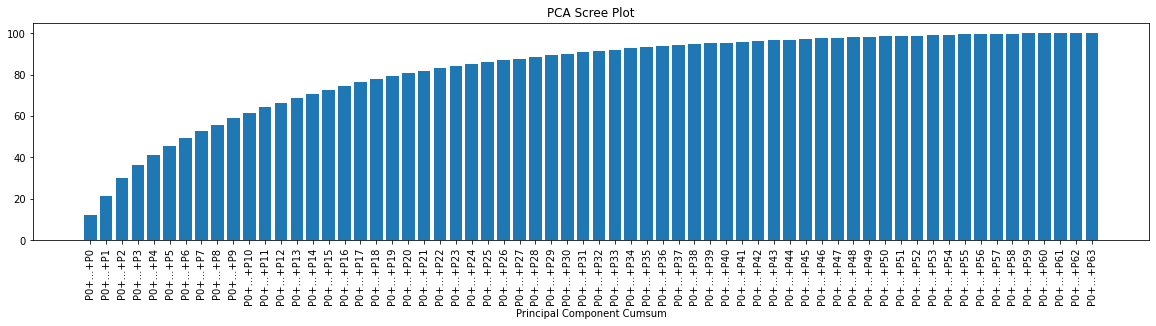

In [38]:
# graficar varianza por la suma acumulada de los componente

percent_variance_cum = np.cumsum(percent_variance)
columns = [ 'P' + str(0) + '+...+P' + str(i) for i in range(n_components) ]

plt.figure(figsize=(20,4))
plt.bar(x= range(0,n_components), height=percent_variance_cum, tick_label=columns)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

### Ejercicio 6


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_. 


In [39]:
def mostar_resultados(digits,model,nx=5, ny=5,label = "correctos"):
    """
    Muestra los resultados de las prediciones de un modelo 
    de clasificacion en particular. Se toman aleatoriamente los valores
    de los resultados.
    
    - label == 'correcto': retorna los valores en que el modelo acierta.
    - label == 'incorrecto': retorna los valores en que el modelo no acierta.

    
    Observacion: El modelo que recibe como argumento debe NO encontrarse
    'entrenado'.
    
    
    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: numero de filas (subplots)
    :param ny: numero de columnas (subplots)
    :param label: datos correctos o incorrectos
    :return: graficos matplotlib
    """
    
    
    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 
    model.fit(X_train, y_train) # ajustando el modelo
    y_pred = model.predict(X_test)

    
    # Mostrar los datos correctos
    if label=="correctos":
        mask = (y_pred == y_test)
        color = "green"
        
    # Mostrar los datos correctos
    elif label=="incorrectos":
        mask = (y_pred != y_test)
        color = "red"
    
    else:
        raise ValueError("Valor incorrecto")
        
    X_aux = X_test
    y_aux_true = y_test
    y_aux_pred = y_pred

    # We'll plot the first 100 examples, randomly choosen
    fig, ax = plt.subplots(nx, ny, figsize=(12,12))
    for i in range(nx):
        for j in range(ny):
            index = j + ny*i
            data  = X_aux[index, :].reshape(8,8)
            label_pred = str(int(y_aux_pred[index]))
            label_true = str(int(y_aux_true[index]))
            ax[i][j].imshow(data, interpolation='nearest', cmap='gray_r')
            ax[i][j].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
            ax[i][j].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
            ax[i][j].get_xaxis().set_visible(False)
            ax[i][j].get_yaxis().set_visible(False)
    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos 


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

In [40]:
model=svm.SVC(C= 2, kernel= 'rbf')

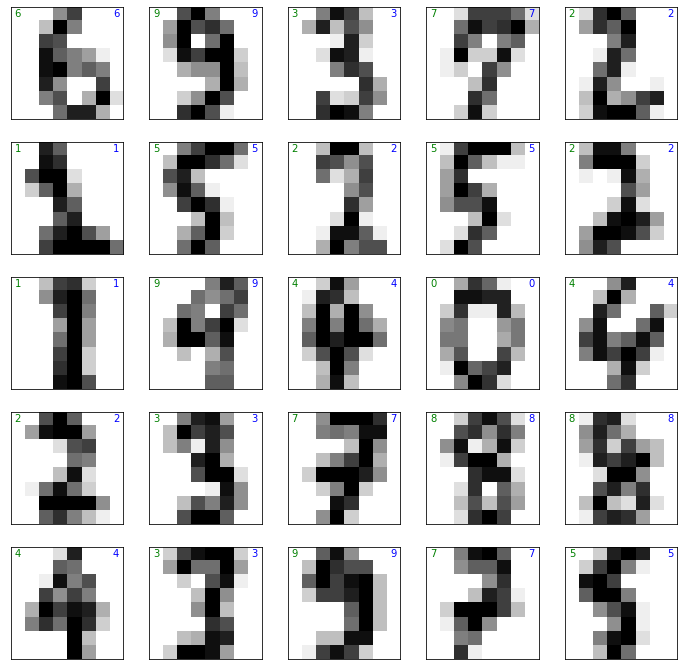

In [41]:
mostar_resultados(digits,model,nx=5, ny=5,label = "correctos")

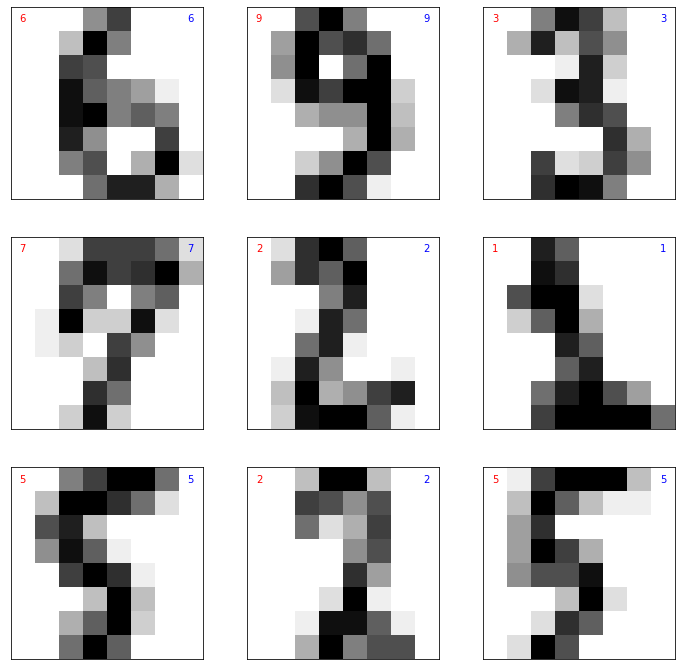

In [42]:
mostar_resultados(digits,svm_final,nx=3, ny=3,label = "incorrectos")

### Ejercicio 7
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

Concluimos que el mejor modelo es el SVM pues las metricas son mejores en comparación a los otros modelos, las visualizaciones nos ayudaron a entender como se comportaban los datos, hubieron dificultades al graficar los datos, sobre todo las curvas de validación pues los datos no venian como los que estaban en el ejemplo de sklearn

## II.- California Housing Prices


<img src="https://www.wartsila.com/images/default-source/default-album/california_housing.tmb-1920x690.jpg?sfvrsn=126bc44_1" width="480" height="240" align="center"/>

Los datos se refieren a las casas encontradas en un distrito determinado de California y algunas estadísticas resumidas sobre ellas basadas en los datos del censo de 1990. Tenga en cuenta que los datos no se limpian, por lo que se requieren algunos pasos de procesamiento previo.

Las columnas son las siguientes, sus nombres se explican por sí mismos:

* longitude
* latitude
* housingmedianage
* total_rooms
* total_bedrooms
* population
* households
* median_income
* medianhousevalue
* ocean_proximity


El objetivo es poder predecir el valor promedio de cada propiedad. 
Para poder completar correctamente este laboratorio, es necesario seguir la siguiente rúbrica de trabajo:

1. Definición del problema
2. Estadística descriptiva
3. Visualización descriptiva
4. Preprocesamiento
5. Selección de modelo 
    1. Por lo menos debe comparar cuatro modelos
    2. Al menos tres de estos modelos tienen que tener hiperparámetros.
    3. Realizar optimización de hiperparámetros.
6. Métricas y análisis de resultados
7. Visualizaciones del modelo
8. Conclusiones

> **Observación**: Puede tomar como referencia lo realizado en la sección **I.- Clasificación de dígitos**. El alumno tiene la libertad de desarrollar un análisis más completo del problema (si así lo desea). Puede tomar como referencia el siguiente [link](https://www.kaggle.com/camnugent/california-housing-prices).

In [43]:
# read data
housing = pd.read_csv('data/housing.csv',sep=',')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# 1. Definición del problema

Predicción del valor promedio de una propiedad, teniendo en cuenta las variables de estudio

# 2. Estadística descriptiva

In [44]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [45]:
housing_numeric=housing.drop('ocean_proximity',axis=1)

# 3. Visualización descriptiva

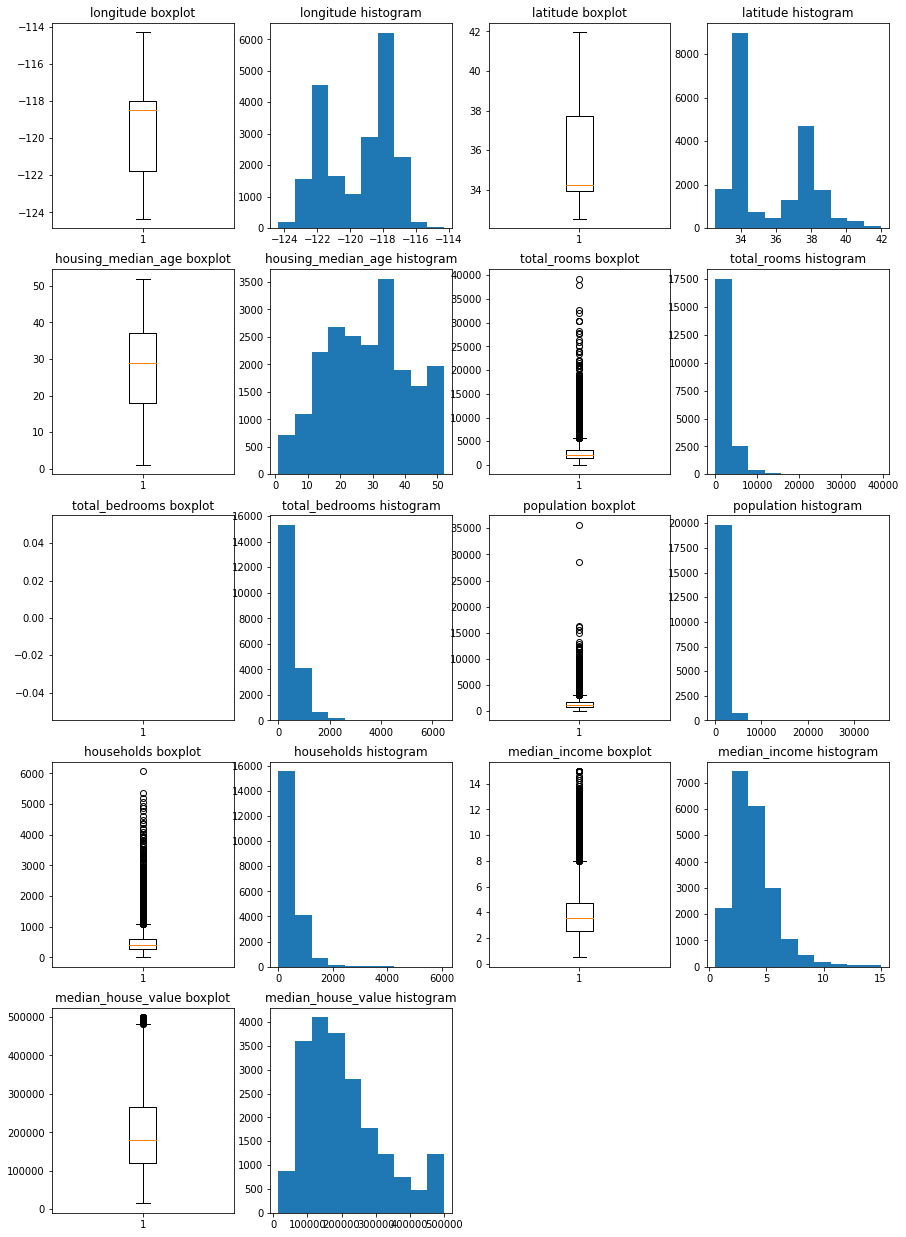

In [46]:
def outliers_visual(data):
    plt.figure(figsize=(15, 40))
    i = 0
    for col in data.columns:
        i += 1
        plt.subplot(9, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(9, 4, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))
    plt.show()
outliers_visual(housing_numeric)

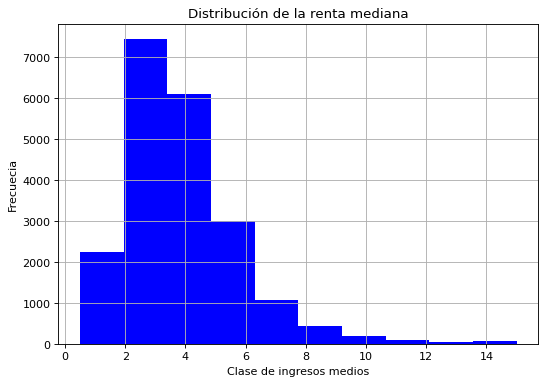

In [47]:
fig = plt.figure(dpi = 80, figsize = (6,4))
ax = fig.add_axes([1,1,1,1])
ax.set(xlabel = 'Clase de ingresos medios',ylabel = 'Frecuecia',title = 'Distribución de la renta mediana')
housing["median_income"].hist(color='blue',ax = ax)
plt.show()

In [48]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [49]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

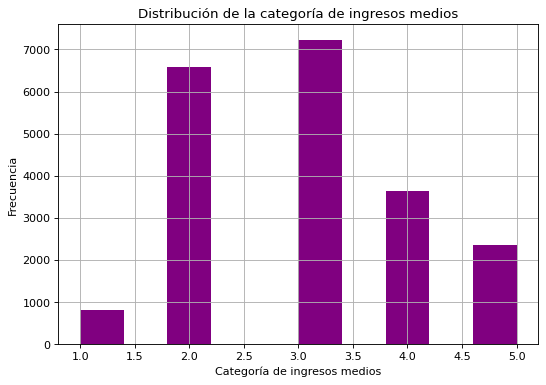

In [50]:
fig = plt.figure(dpi = 80, figsize = (6,4))
ax = fig.add_axes([1,1,1,1])
ax.set(xlabel = 'Categoría de ingresos medios',ylabel = 'Frecuencia',title = 'Distribución de la categoría de ingresos medios')
housing["income_cat"].hist(color = 'purple',ax=ax)
plt.show()

La mayoría de los valores de ingresos medios se agrupan alrededor de 2 a 5 (decenas de miles de dólares), pero algunos ingresos medios van mucho más allá de 6. Es importante tener una cantidad suficiente de instancias en su conjunto de datos para cada estrato, o bien la estimación de la la importancia del estrato puede estar sesgada. Esto significa que no debe tener demasiados estratos, y cada estrato debe ser lo suficientemente grande.

# 4. Preprocesamiento

In [51]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [52]:
housing = strat_train_set.copy()

/var/folders/fv/cb87vyq954957sywgxh8ngbm0000gn/T/ipykernel_5063/654814021.py:5: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  california_img=mpimg.imread("https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/California_Locator_Map.PNG/280px-California_Locator_Map.PNG")
/var/folders/fv/cb87vyq954957sywgxh8ngbm0000gn/T/ipykernel_5063/654814021.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)


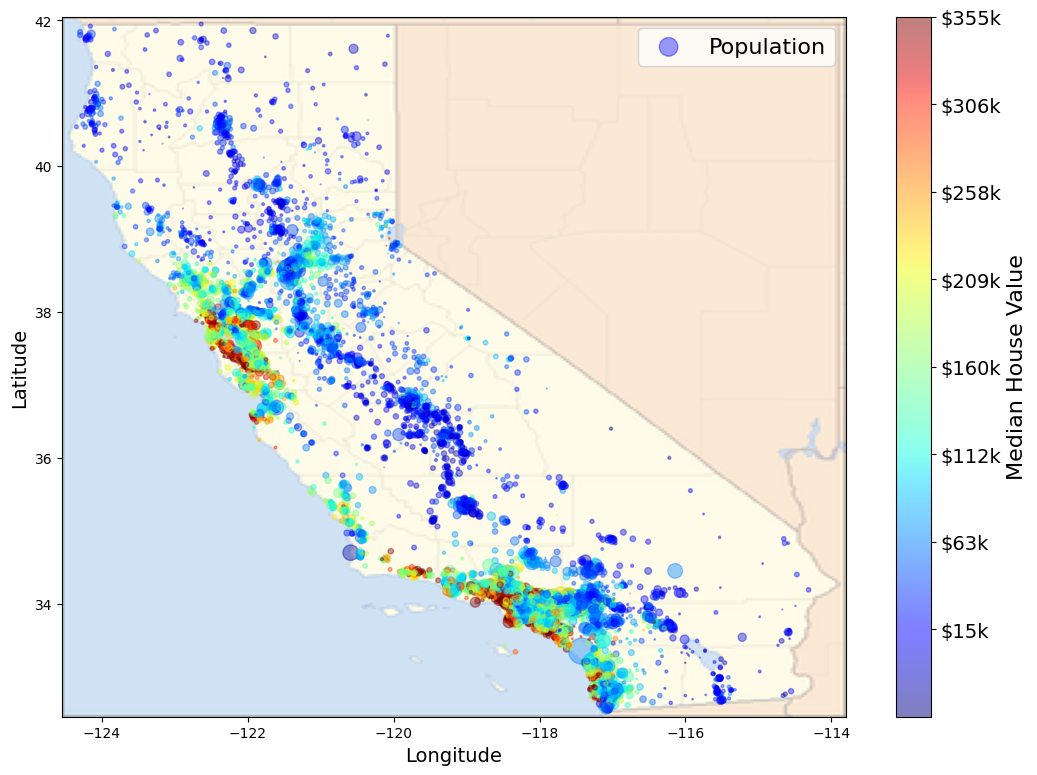

In [53]:
fig = plt.figure(dpi = 100,figsize = (4,4))
ax = fig.add_axes([1,1,1,1])

import matplotlib.image as mpimg
california_img=mpimg.imread("https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/California_Locator_Map.PNG/280px-California_Locator_Map.PNG")
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),ax=ax,
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show();

Esta imagen dice que el precio de la vivienda está muy relacionado con la ubicación y la densidad de población.

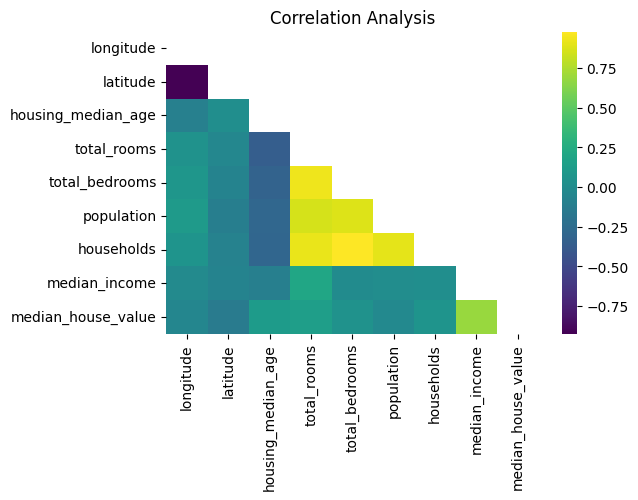

In [54]:
import seaborn as sns
corr = housing.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))

plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(corr,mask=mask,annot=False,lw=0,linecolor='white',cmap='viridis',fmt = "0.2f")
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.show()

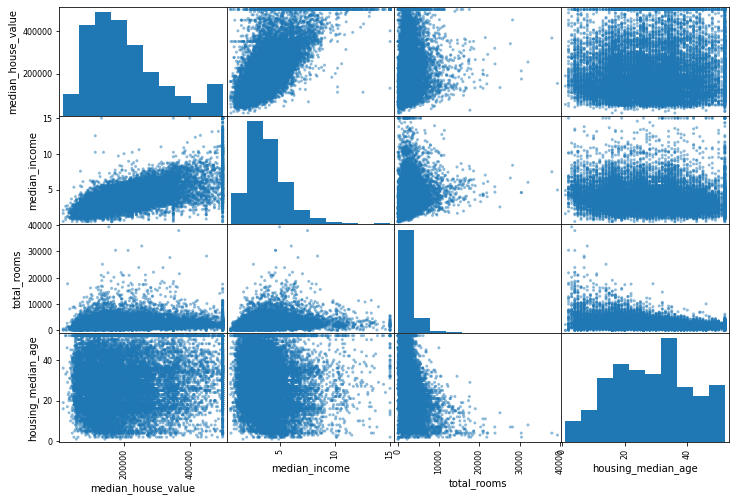

In [55]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

El atributo más prometedor para predecir el valor medio de la vivienda es el ingreso medio, así que ampliemos su diagrama de dispersión de correlación.

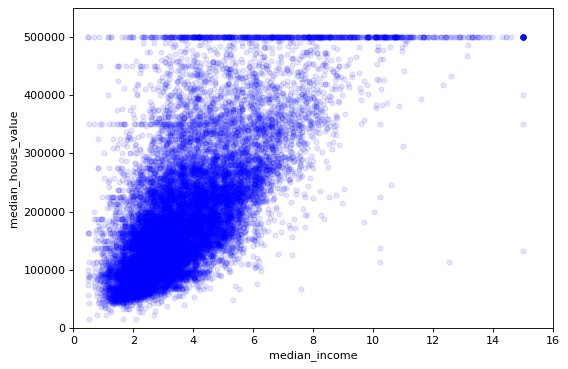

In [56]:
fig = plt.figure(dpi = 80, figsize = (6,4))
ax = fig.add_axes([1,1,1,1])

housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1,color = 'blue',ax=ax)
plt.axis([0, 16, 0, 550000])
plt.show()

Esta trama revela algunas cosas. Primero, la correlación es realmente muy fuerte; se puede ver claramente la tendencia alcista y los puntos no están demasiado dispersos.

Creemos más atributos

In [57]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

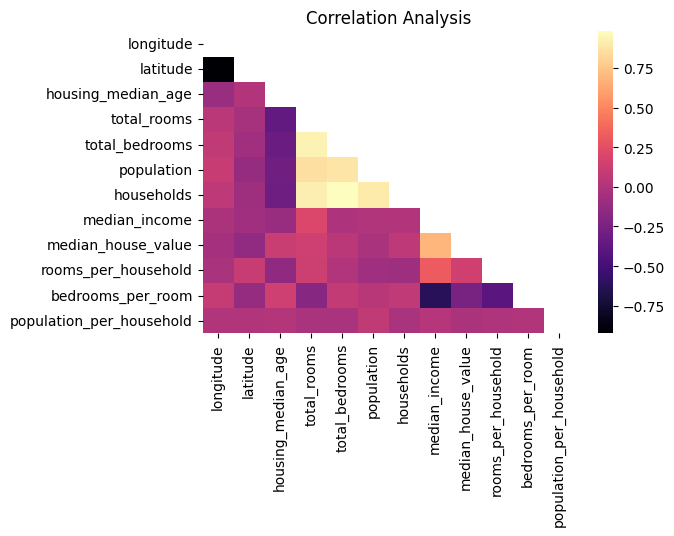

In [58]:
corr = housing.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))

plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(corr,mask=mask,annot=False,lw=0,linecolor='white',cmap='magma',fmt = "0.2f")
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.show()

El nuevo atributo bedroom_per_room está mucho más correlacionado con el valor medio de la casa que con el número total de habitaciones o dormitorios.

# 5-6. Selección del modelo, metricas y analisis de resultados

# Preparamos los datos

In [59]:
housing=housing.dropna()
X = housing.drop(["median_house_value","ocean_proximity"], axis=1) # drop labels for training set
y = housing["median_house_value"].copy()

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

print('Largo del conjunto de entrenamiento: ', len(X_train))
print('Largo del conjunto de testeo: ', len(X_test))

Largo del conjunto de entrenamiento:  12265
Largo del conjunto de testeo:  4089


# 5-6.1 Random forest

In [61]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=5, random_state=42)

In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search_forest_reg = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search_forest_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [63]:
grid_search_forest_reg.best_params_

{'max_features': 8, 'n_estimators': 30}

In [64]:
grid_search_forest_reg.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [65]:
cvres = grid_search_forest_reg.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

69546.53414080178 {'max_features': 2, 'n_estimators': 3}
59955.54506073103 {'max_features': 2, 'n_estimators': 10}
57138.706824149114 {'max_features': 2, 'n_estimators': 30}
64844.425691697514 {'max_features': 4, 'n_estimators': 3}
57340.694801160214 {'max_features': 4, 'n_estimators': 10}
54496.57397094539 {'max_features': 4, 'n_estimators': 30}
64708.76488165473 {'max_features': 6, 'n_estimators': 3}
56388.55748579204 {'max_features': 6, 'n_estimators': 10}
54602.46863327206 {'max_features': 6, 'n_estimators': 30}
62827.448695539235 {'max_features': 8, 'n_estimators': 3}
55894.458918116194 {'max_features': 8, 'n_estimators': 10}
54244.32171540828 {'max_features': 8, 'n_estimators': 30}
66732.03178612351 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
58598.75666129209 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
66725.73655473751 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
57033.37618479313 {'bootstrap': False, 'max_features': 3, 'n_estimators

# Evaluamos el modelo

In [66]:
y_true_RF =  list(y_test)
y_pred_RF = list(grid_search_forest_reg.predict(X_test))

In [67]:
from metrics_regression import *
from sklearn.metrics import r2_score
# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_true_RF,
        'yhat':y_pred_RF
        }
)

df_metrics1 = summary_metrics(df_temp)
df_metrics1['r2']=r2_score(y_true_RF,y_pred_RF)
print("\nMetricas para los regresores")
print("")
df_metrics1


Metricas para los regresores



,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,34886.722,2.754637e+09,52484.6395,0.1947,0.1764,0.1677,0.1947,0.1729,0.795593


# 5-6.2 KN-Regressor

In [68]:
from sklearn.neighbors import KNeighborsRegressor

In [69]:
model=KNeighborsRegressor()
param = {
    'n_neighbors': (1,10, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev'),}  
grid_search_KN=GridSearchCV(estimator=model,param_grid=param)
grid_search_KN.fit(X_train,y_train)
print('Los mejores parametros son: ', grid_search_KN.best_params_)
print('La precisión es de: ', grid_search_KN.best_score_)

Los mejores parametros son:  {'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
La precisión es de:  0.334646241816392


In [70]:
grid_search_KN.best_params_

{'leaf_size': 20,
 'metric': 'minkowski',
 'n_neighbors': 10,
 'p': 1,
 'weights': 'distance'}

In [71]:
grid_search_KN.best_estimator_

KNeighborsRegressor(leaf_size=20, n_neighbors=10, p=1, weights='distance')

In [72]:
cvres = grid_search_KN.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.3781730654783734 {'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
0.3781730654783734 {'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
0.46117821282367066 {'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
0.46117821282367066 {'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
nan {'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
nan {'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
nan {'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}
nan {'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
0.3781730654783734 {'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
0.3781730654783734 {'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 1, 

/var/folders/fv/cb87vyq954957sywgxh8ngbm0000gn/T/ipykernel_5063/230061552.py:3: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(-mean_score), params)


# Evaluamos el modelo

In [73]:
y_true_KN =  list(y_test)
y_pred_KN = list(grid_search_KN.predict(X_test))

In [74]:
from metrics_regression import *
# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_true_KN,
        'yhat':y_pred_KN
        }
)

df_metrics2 = summary_metrics(df_temp)
df_metrics2['r2']=r2_score(y_true_KN,y_pred_KN)
print("\nMetricas para los regresores")
print("")
df_metrics2


Metricas para los regresores



,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,72967.559,8.738650e+09,93480.7493,0.4792,0.3742,0.3507,0.4792,0.3723,0.351551


# 5-6.3 Regresión Lineal

In [75]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

# Evaluamos el modelo

In [76]:
y_true_RL =  list(y_test)
y_pred_RL = list(lin_reg.predict(X_test))

In [77]:
from metrics_regression import *
# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_true_RL,
        'yhat':y_pred_RL
        }
)

df_metrics3 = summary_metrics(df_temp)
df_metrics3['r2']=r2_score(y_true_RL,y_pred_RL)
print("\nMetricas para los regresores")
print("")
df_metrics3


Metricas para los regresores



,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,50317.4494,4.751323e+09,68929.8403,0.2973,0.2638,0.2418,0.2973,0.2739,0.647429


# 5-6.4 Decision tree regressor

In [78]:
from sklearn.tree import DecisionTreeRegressor

In [79]:
tree_para = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

In [80]:
dtr = DecisionTreeRegressor(random_state = 1)

In [81]:
grid_search_DTR = GridSearchCV(estimator = dtr,
                        param_grid = tree_para,
                        cv = 5,
                       return_train_score=True)

In [82]:
grid_search_DTR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]},
             return_train_score=True)

In [83]:
grid_search_DTR.best_params_

{'max_depth': 8}

In [84]:
grid_search_DTR.best_estimator_

DecisionTreeRegressor(max_depth=8, random_state=1)

# Evaluamos el modelo

In [85]:
y_true_DT =  list(y_test)
y_pred_DT = list(grid_search_DTR.best_estimator_.predict(X_test))

In [86]:
from metrics_regression import *
# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_true_DT,
        'yhat':y_pred_DT
        }
)

df_metrics4 = summary_metrics(df_temp)
df_metrics4['r2']=r2_score(y_true_DT,y_pred_DT)
print("\nMetricas para los regresores")
print("")
df_metrics4


Metricas para los regresores



,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,43705.1392,4.078562e+09,63863.6172,0.2459,0.2196,0.2101,0.2459,0.2201,0.697351


In [89]:
df=pd.concat([df_metrics1,df_metrics2,df_metrics3,df_metrics4])
df['Modelo']=['Random Forest','KN-Regressor','Regresion lineal','Decision Tree Regressor']
df

,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2,Modelo
0,34886.7220,2.754637e+09,52484.6395,0.1947,0.1764,0.1677,0.1947,0.1729,0.795593,Random Forest
0,72967.5590,8.738650e+09,93480.7493,0.4792,0.3742,0.3507,0.4792,0.3723,0.351551,KN-Regressor
0,50317.4494,4.751323e+09,68929.8403,0.2973,0.2638,0.2418,0.2973,0.2739,0.647429,Regresion lineal
0,43705.1392,4.078562e+09,63863.6172,0.2459,0.2196,0.2101,0.2459,0.2201,0.697351,Decision Tree Regressor


En conclusión el mejor modelo entregado considerando las métricas asociadas a la regresión es el Random-Forest

# 7. Visualizaciones del modelo


/Users/felix/opt/anaconda3/envs/mat_281/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/felix/opt/anaconda3/envs/mat_281/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


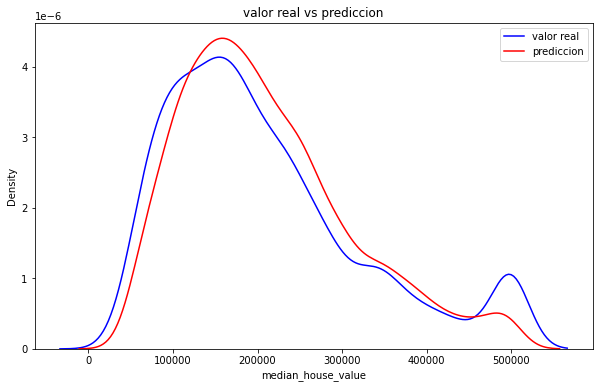

In [88]:
y_pred = y_pred_RF
plt.figure(figsize=(10, 6))

ax = sns.distplot(y_test, hist=False, color="b", label="valor real")
sns.distplot(y_pred, hist=False, color="r", label="prediccion" , ax=ax)

plt.title('valor real vs prediccion')
plt.legend()
plt.show()

# 8. Conclusiones

Se concluye que el mejor modelo es el Random-Forest pues las métricas observadas en comparación a los otros modelos son mas signifiativas, también el gráfico ayuda a visualizar las predicciones que son bastante cercanas a la realidad y reflejan el comportamiento de la variable de estuio